In [2]:
import joblib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
full_data_ready_encode = pd.read_csv('Dataset/full_data_ready_encode.csv')

In [4]:
x1 = full_data_ready_encode.drop('Attrition', axis = 1)
y1 = full_data_ready_encode['Attrition']

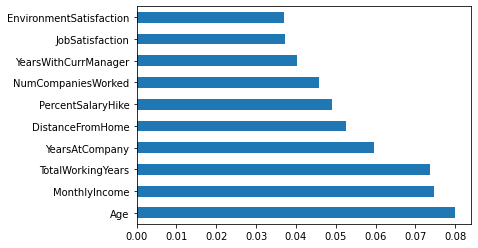

In [5]:
model = RandomForestClassifier()
model.fit(x1, y1)
feat_importances = pd.Series(model.feature_importances_, index = x1.columns)
feat_importances.nlargest(10).plot.barh()
plt.show()

In [7]:
df_selected = full_data_ready_encode[['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany','DistanceFromHome','PercentSalaryHike',
                        'NumCompaniesWorked','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','Attrition']]

In [8]:
df_selected.head()

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,DistanceFromHome,PercentSalaryHike,NumCompaniesWorked,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,Attrition
0,51,131160,1,1,6,11,1,0,3,4,0
1,31,41890,6,5,10,23,0,4,3,2,1
2,32,193280,5,5,17,15,1,3,2,2,0
3,38,83210,13,8,2,11,3,5,4,4,0
4,32,23420,9,6,10,12,4,4,4,1,0


In [11]:
x_select = df_selected.drop('Attrition', axis = 1)
y_select = df_selected['Attrition']

In [12]:
x_select_train, x_select_test, y_select_train, y_select_test = train_test_split(x_select,y_select,test_size = 0.20,random_state = 42)

[[741   0]
 [  8 133]]


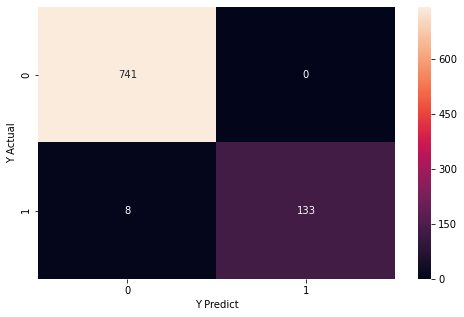

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       1.00      0.94      0.97       141

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882

Train score: 100.0%
Test score: 99.09%

RandomForest Cross Validation Score: 87.98%



In [13]:
rfc_select = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              n_estimators=100,random_state=1)
rfc_select.fit(x_select_train, y_select_train)

y1_pred_select = rfc_select.predict(x_select_test)

print(confusion_matrix(y_select_test, y1_pred_select))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_select_test, y1_pred_select), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

print(classification_report(y_select_test, y1_pred_select))
print(f'Train score: {round(rfc_select.score(x_select_train, y_select_train)*100, 2)}%')
print(f'Test score: {round(rfc_select.score(x_select_test, y_select_test)*100, 2)}%\n')

rfc_select_score = cross_val_score(rfc_select, x_select_test, y_select_test, cv=10).mean()
print(f'RandomForest Cross Validation Score: {round(rfc_select_score*100, 2)}%\n')

In [14]:
joblib.dump(rfc_select, 'modelJoblib')

['modelJoblib']